In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [6]:
dataaset=pd.read_csv('Algerian_forest_fires_dataset.csv')


In [7]:
dataaset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [8]:
dataaset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [9]:
dataaset[dataaset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [10]:
dataaset.loc[:122,"Region"]=0
dataaset.loc[:122,"Region"]=1
dff=dataaset


In [11]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       123 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [12]:
dff['Region'] = dff['Region'].fillna(0).astype(int)


In [13]:
dff.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [14]:
## remove of null values
dff.dropna().reset_index(drop=True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0


In [15]:
print(dff['Region'].isnull().sum())  # Shows how many NaNs
print(dff['Region'].unique())        # Shows unique values, look for NaN or inf


0
[1 0]


In [16]:
dff[['Region']]=dff[['Region']].astype(int)
dff.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [17]:
dff.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [18]:
dff.columns=dff.columns.str.strip()
dff.columns


Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [19]:
dff.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [20]:
#now we convert the object type into int type
dff.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [21]:
print(dff[['month','year','Temperature', 'RH','Ws']].head(10))


  month  year Temperature  RH  Ws
0     6  2012          29  57  18
1     6  2012          29  61  13
2     6  2012          26  82  22
3     6  2012          25  89  13
4     6  2012          27  77  16
5     6  2012          31  67  14
6     6  2012          33  54  13
7     6  2012          30  73  15
8     6  2012          25  88  13
9     6  2012          28  79  12


In [22]:
print(dff[['month','year','Temperature', 'RH','Ws']].dtypes)


month          object
year           object
Temperature    object
RH             object
Ws             object
dtype: object


In [23]:
cols = ['month', 'year', 'Temperature', 'RH', 'Ws']
for col in cols:
    dff[col] = pd.to_numeric(dff[col], errors='coerce')


In [24]:
dff[cols] = dff[cols].fillna(0).astype(int)


In [25]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        247 non-null    int32 
 2   year         247 non-null    int32 
 3   Temperature  247 non-null    int32 
 4   RH           247 non-null    int32 
 5   Ws           247 non-null    int32 
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       247 non-null    int32 
dtypes: int32(6), object(9)
memory usage: 23.3+ KB


In [26]:
dff.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [27]:
# so we convert the remaining object type attributes into floating values
objects=[features for features in dff.columns if dff[features].dtypes=='0']
print(objects)

[]


In [28]:
for i in objects:
    if i!= 'Classes':
        dff[i]=dff[i].astype(float)

In [29]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        247 non-null    int32 
 2   year         247 non-null    int32 
 3   Temperature  247 non-null    int32 
 4   RH           247 non-null    int32 
 5   Ws           247 non-null    int32 
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       247 non-null    int32 
dtypes: int32(6), object(9)
memory usage: 23.3+ KB


In [30]:
dff.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

In [31]:
#exploratory data analysis
dff_copy=dff.drop(['day' ,'month' , 'year'], axis=1) # drop these becuse date don't play imp role

In [32]:
dff_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [33]:
dff_copy['Classes'].value_counts() #encoding of the categories of classes

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: count, dtype: int64

In [34]:
dff_copy['Classes']=np.where(dff_copy['Classes'].str.contains('not fire'),0,1)

In [35]:
dff_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,1
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,1


In [36]:
dff_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,1,0
243,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,0,0
244,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,0
245,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,0
246,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,0


In [37]:
percentage=dff_copy['Classes'].value_counts(normalize=True)*100

In [38]:
classlabels=['Fire',"Not Fire"]
plt.figure(figsize=(12,7))
plt.pie=(percentage,labels=classlabels,autopct=='%1.1f%%')
plt.show()

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2068691519.py, line 3)

In [ ]:
# Option 1: Use numeric_only=True (Pandas >= 1.5.0)
dff_copy.corr(numeric_only=True)

# Option 2: Manually select only numeric columns
dff_copy.select_dtypes(include='number').corr()


,Temperature,RH,Ws,Classes,Region
Temperature,1.000000,-0.133268,0.193917,0.394948,-0.168841
RH,-0.133268,1.000000,0.400460,-0.358661,0.382294
Ws,0.193917,0.400460,1.000000,-0.036419,0.169087
Classes,0.394948,-0.358661,-0.036419,1.000000,-0.158517
Region,-0.168841,0.382294,0.169087,-0.158517,1.000000


In [ ]:
import seaborn as sns

<Axes: ylabel='FWI'>

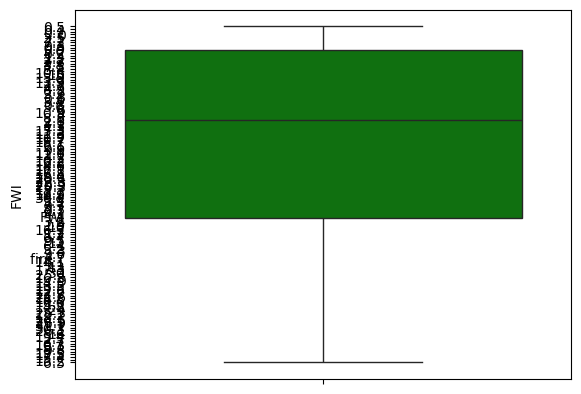

In [40]:
sns.boxplot(dff_copy['FWI'],color='green') ## it indicate the outlier

In [41]:
dff_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,1
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,1


In [43]:
#independent and dependent features
X=dff_copy.drop('FWI',axis=1)
Y=dff_copy['FWI']

In [44]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,1
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0,1


In [47]:
Y

0      0.5
1      0.4
2      0.1
3        0
4      0.5
      ... 
242    6.5
243      0
244    0.2
245    0.7
246    0.5
Name: FWI, Length: 247, dtype: object

In [48]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [49]:
X_train.shape,X_test.shape

((185, 11), (62, 11))

In [52]:
from sklearn.preprocessing import LabelEncoder

# Example if you want to label encode all object columns
for col in X_train.select_dtypes(include='object'):
    X_train[col] = X_train[col].str.strip()  # remove leading/trailing spaces
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])


In [53]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.058807,0.275695,-0.539660,0.305406,-0.103186,-0.290397,0.120101,-0.101755,0.386930,-0.173731
RH,-0.058807,1.000000,0.402513,-0.012782,-0.690908,-0.083222,-0.035409,-0.374932,-0.092933,-0.354903,0.366737
Ws,0.275695,0.402513,1.000000,-0.184548,-0.209620,-0.196360,-0.065585,-0.165667,-0.191841,0.012043,0.209130
Rain,-0.539660,-0.012782,-0.184548,1.000000,-0.473856,0.044795,0.457799,-0.371726,0.058477,-0.484821,-0.008653
FFMC,0.305406,-0.690908,-0.209620,-0.473856,1.000000,0.047920,-0.220702,0.760174,0.057960,0.818945,-0.258213
DMC,-0.103186,-0.083222,-0.196360,0.044795,0.047920,1.000000,-0.126472,-0.003592,0.736590,-0.056249,-0.091386
DC,-0.290397,-0.035409,-0.065585,0.457799,-0.220702,-0.126472,1.000000,-0.174826,-0.168956,-0.167280,0.036501
ISI,0.120101,-0.374932,-0.165667,-0.371726,0.760174,-0.003592,-0.174826,1.000000,0.009584,0.726651,-0.053316
BUI,-0.101755,-0.092933,-0.191841,0.058477,0.057960,0.736590,-0.168956,0.009584,1.000000,-0.056023,-0.055586
Classes,0.386930,-0.354903,0.012043,-0.484821,0.818945,-0.056249,-0.167280,0.726651,-0.056023,1.000000,-0.189994


In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,Y_pred)
 
 
 

ImportError: cannot import name 'r2_score' from 'sklearn' (c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\__init__.py)